## Project Objective / Business Relevance

The aim of this project is to group bank customers using their transaction behaviour. This will be done using RFM analysis which is a powerful method to quantify behaviour using the following criteria:
- Recency: how recent a customer has made a purchase
- Frequency: how frequently a customer makes purchases
- Monetary: how much money a customer spends

The results of this project are extremely useful from a marketing perspective to tailer targeted marketing strategies based on customer behaviour to guide promotional content.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

## Importing and Cleaning Data

The bank_transactions dataset was taken from kaggle at https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation. The dataset contains over 1 million transactions from an Indian Bank.

In [51]:
# Importing bank transactions data
bank_df = pd.read_csv('bank_transactions.csv')
bank_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


First the columns that would be used for demographic segmentation but are not of interest to us are removed. In addition, the account balance and the transaction time will not be used. Only the transaction date will be used for recency as the number of days since the last transaction is sufficient information for recency criteria.

In [52]:
# Dropping columns that won't be used
bank_df = bank_df.drop(['CustomerDOB', 'CustGender', 'CustLocation', 'TransactionTime'], axis=1)
bank_df

,TransactionID,CustomerID,CustAccountBalance,TransactionDate,TransactionAmount (INR)
0,T1,C5841053,17819.05,2/8/16,25.0
1,T2,C2142763,2270.69,2/8/16,27999.0
2,T3,C4417068,17874.44,2/8/16,459.0
3,T4,C5342380,866503.21,2/8/16,2060.0
4,T5,C9031234,6714.43,2/8/16,1762.5
...,...,...,...,...,...
1048562,T1048563,C8020229,7635.19,18/9/16,799.0
1048563,T1048564,C6459278,27311.42,18/9/16,460.0
1048564,T1048565,C6412354,221757.06,18/9/16,770.0
1048565,T1048566,C6420483,10117.87,18/9/16,1000.0


In [53]:
# Checking for missing values
bank_df.isna().sum()

TransactionID                 0
CustomerID                    0
CustAccountBalance         2369
TransactionDate               0
TransactionAmount (INR)       0
dtype: int64

In [54]:
# The rows with missing account balances are removed
bank_df = bank_df.dropna(subset=['CustAccountBalance'])
bank_df.isna().sum()

TransactionID              0
CustomerID                 0
CustAccountBalance         0
TransactionDate            0
TransactionAmount (INR)    0
dtype: int64

There are no remaining missing values in the columns.

In [55]:
# Showing column data types
bank_df.dtypes

TransactionID               object
CustomerID                  object
CustAccountBalance         float64
TransactionDate             object
TransactionAmount (INR)    float64
dtype: object

In [56]:
# Displaying number of unique dates in dataset
bank_df['TransactionDate'].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

From the date entries it is clear that the dates are spread out over 3 months in 2016 (Aug, Sep, Oct) so the format is day/month/year.

In [57]:
# Converting TransactionDate type to DateTime
from datetime import date
bank_df['TransactionDate'] = pd.to_datetime(bank_df.loc[:, 'TransactionDate'], format="%d/%m/%y")
bank_df['TransactionDate']

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/677643936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df['TransactionDate'] = pd.to_datetime(bank_df.loc[:, 'TransactionDate'], format="%d/%m/%y")


0         2016-08-02
1         2016-08-02
2         2016-08-02
3         2016-08-02
4         2016-08-02
             ...    
1048562   2016-09-18
1048563   2016-09-18
1048564   2016-09-18
1048565   2016-09-18
1048566   2016-09-18
Name: TransactionDate, Length: 1046198, dtype: datetime64[ns]

We would convert the transaction amount values from Indian Rupees (INR) to CAD or USD. However, general prices in india likely don't convert the same way currency does. So the amounts will be kept in INR for now.

In [58]:
# Renaming transaction amount column
bank_df = bank_df.rename(columns={'TransactionAmount (INR)': 'Amount', 'TransactionDate': 'Date', 'CustAccountBalance': 'Balance'})
bank_df

,TransactionID,CustomerID,Balance,Date,Amount
0,T1,C5841053,17819.05,2016-08-02,25.0
1,T2,C2142763,2270.69,2016-08-02,27999.0
2,T3,C4417068,17874.44,2016-08-02,459.0
3,T4,C5342380,866503.21,2016-08-02,2060.0
4,T5,C9031234,6714.43,2016-08-02,1762.5
...,...,...,...,...,...
1048562,T1048563,C8020229,7635.19,2016-09-18,799.0
1048563,T1048564,C6459278,27311.42,2016-09-18,460.0
1048564,T1048565,C6412354,221757.06,2016-09-18,770.0
1048565,T1048566,C6420483,10117.87,2016-09-18,1000.0


Because transaction amounts can very significantly there is a large variation in the values in this column. The IQR outlier method determines there are 112134 outliers in this dataset (which is roughly a tenth of the dataset). These are likely actual transactions from clients spending large sums of money instead of erros in data collection. These outliers will therefore be kept. 

From the describe dataframe, we see that the minimum transaction amount is 0. This doesn't make sense in the context of our problem so observations with TransactionAmount of 0 will be removed.

In [59]:
# Determining rows to drop with 0 transaction amount
zero_amount_rows = bank_df[bank_df['Amount'] == 0]
rows_to_drop = zero_amount_rows.index
# Dropping specified rows
bank_df.drop(labels=rows_to_drop, axis=0, inplace=True)
bank_df.shape

(1045368, 5)

In [60]:
# Ensuring all transactionID values are unique
if bank_df['TransactionID'].nunique() == len(bank_df):
    print("There are no duplicate transaction ID's")

There are no duplicate transaction ID's


In [61]:
duplicates = bank_df.duplicated(subset='TransactionID')
if duplicates.any() == False:
    print('There are no duplicate transactions.')

There are no duplicate transactions.


## Feature Engineering

The existing features will now be transformed into features used for RFM. The RFM features will be obtained as follows:
- Recency: the number of days since the customer's last purchase will be calculated. This will be done using a reference date, which will be 2016-10-22 since it is one day after the latest date in the dataset (2016-10-21). The date of most recent purchase will then be subtracted from this reference date for each customer
- Frequency: the number of total transactions from each customer during the time period.
- Monetary: the average purchase amount calculated by dividing total amount spent by number of transactions

### Frequency will be later removed due to low variance. The account balance column will be kept instead in an effort to provide more information for customer segmentation.

In [62]:
# Making reference date for recency
ref_date = pd.to_datetime('22/10/16', format="%d/%m/%y")
ref_date

Timestamp('2016-10-22 00:00:00')

In [63]:
# Using pandas groupby.agg to group the observations by CustomerID then applying specific functions to each column to obtain the RFM variables
rfm_df = bank_df.groupby('CustomerID').agg({'Date': lambda x: (ref_date - x.max()), 'TransactionID': 'count', 'Amount': 'sum', 'Balance': 'sum'})
rfm_df

,Date,TransactionID,Amount,Balance
CustomerID,,,,
C1010011,26 days,2,5106.0,152681.27
C1010012,69 days,1,1499.0,24204.49
C1010014,76 days,2,1455.0,200225.90
C1010018,37 days,1,30.0,496.18
C1010024,65 days,1,5000.0,87058.65
...,...,...,...,...
C9099836,76 days,1,691.0,133067.23
C9099877,37 days,1,222.0,96063.46
C9099919,65 days,1,126.0,5559.75


In [64]:
# Renaming column as RFM variables and balance to savings
rfm_df.rename(columns={'Date':'Recency', 'TransactionID':'Frequency', 'Amount':'Monetary', 'Balance': 'Savings'}, inplace=True)
# Dividing total amount spent by number of transactions
rfm_df['Monetary'] = rfm_df['Monetary'] / rfm_df['Frequency']
# Dividing total savings by number of transactions to get average savings amount
rfm_df['Savings'] = rfm_df['Savings'] / rfm_df['Frequency']
# Removing 'days' from Recency
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df

,Recency,Frequency,Monetary,Savings
CustomerID,,,,
C1010011,26,2,2553.0,76340.635
C1010012,69,1,1499.0,24204.490
C1010014,76,2,727.5,100112.950
C1010018,37,1,30.0,496.180
C1010024,65,1,5000.0,87058.650
...,...,...,...,...
C9099836,76,1,691.0,133067.230
C9099877,37,1,222.0,96063.460
C9099919,65,1,126.0,5559.750


In [66]:
rfm_df = rfm_df.sample(frac=0.1, replace=False)
rfm_df

,Recency,Frequency,Monetary,Savings
CustomerID,,,,
C4536058,76,1,255.00,1526.10
C1297687,77,1,3536.67,35495.96
C4819291,81,1,105.00,17813.77
C1821025,57,1,200.00,5504.03
C3127057,66,1,392.00,1002.62
...,...,...,...,...
C3820958,22,1,3000.00,10757.65
C1046932,76,1,707.00,59077.64
C9034114,76,1,599.00,23758.15


In [67]:
rfm_df.describe()

,Recency,Frequency,Monetary,Savings
count,8820.000000,8820.000000,8820.000000,8.820000e+03
mean,56.217914,1.188889,1489.243632,1.112072e+05
std,15.250440,0.450436,5018.238162,7.700818e+05
min,1.000000,1.000000,0.750000,0.000000e+00
25%,44.000000,1.000000,195.000000,5.666500e+03
50%,56.000000,1.000000,500.000000,1.934749e+04
75%,69.000000,1.000000,1215.721250,6.146565e+04
max,82.000000,4.000000,195400.000000,5.099967e+07


Outliers indicate customers who either make big, frequent or recent purchases (or all of the above). Although these customers are of interest due to their value to the bank, there are relatively few of them (only 33,000 rows will be dropped - 3.75% of the dataset). Importantly, K-Means clustering is sensitive to outliers so it is important to eliminate them to obtain tight informative clusters.

A separate study could be done on the outlier customers to see if creating specific rewards for high frequency/monetary/recency customers would be benefical to the bank.

The z-score method will be used to remove outliers more than 3 standard deviations from the mean.

In [68]:
# Removing outliers
from scipy import stats
# Keeping values for which z-score is smaller 3 (less than 3 standard deviations from the mean)
keep = (np.abs(stats.zscore(rfm_df)) < 3).all(axis=1)
rfm_df = rfm_df[keep]
rfm_df

,Recency,Frequency,Monetary,Savings
CustomerID,,,,
C4536058,76,1,255.00,1526.10
C1297687,77,1,3536.67,35495.96
C4819291,81,1,105.00,17813.77
C1821025,57,1,200.00,5504.03
C3127057,66,1,392.00,1002.62
...,...,...,...,...
C3820958,22,1,3000.00,10757.65
C1046932,76,1,707.00,59077.64
C9034114,76,1,599.00,23758.15


In [69]:
# The new distribution stata without outliers
rfm_df.describe()

,Recency,Frequency,Monetary,Savings
count,8467.000000,8467.000000,8467.000000,8.467000e+03
mean,56.674501,1.148459,1092.102193,8.054006e+04
std,14.833555,0.355575,1825.512089,2.074810e+05
min,22.000000,1.000000,0.750000,0.000000e+00
25%,44.000000,1.000000,189.465000,5.475810e+03
50%,56.000000,1.000000,475.000000,1.854112e+04
75%,70.000000,1.000000,1160.000000,5.826892e+04
max,82.000000,2.000000,16489.000000,2.393629e+06


After removing outliers, the freqeuncy feature has very little variance. There is very little difference between 1 and 2 purchases. It will therefore be removed since it carries little information.

In [70]:
rfm_df.drop(['Frequency', 'Recency'], axis=1, inplace=True)
rfm_df.columns

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/3078150610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df.drop(['Frequency', 'Recency'], axis=1, inplace=True)


Index(['Monetary', 'Savings'], dtype='object')

### Data Scaling

The date will now be scaled as all features must be on the same scale for proper clustering. The current distribution for each feature will be examined using histograms.

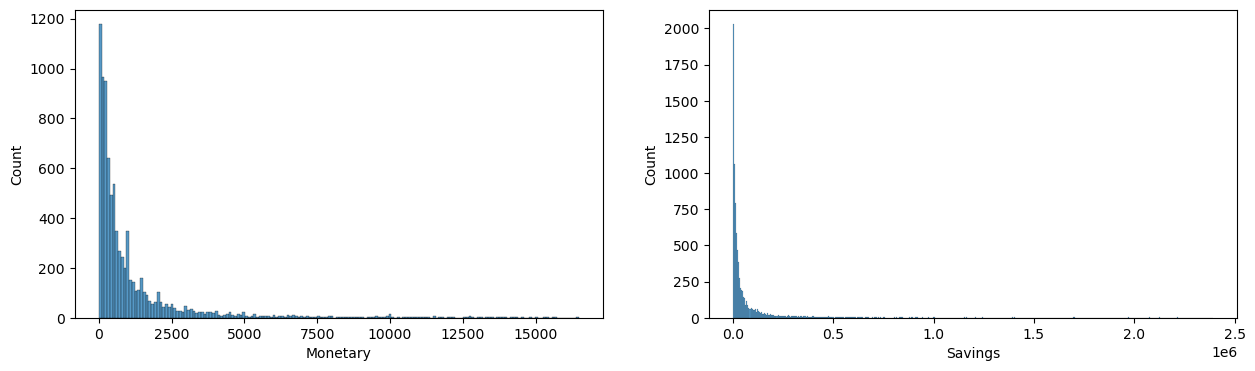

In [71]:
# format of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15,4))
# create histograms
for i, col in enumerate(rfm_df.columns):
    sns.histplot(data=rfm_df, x=col, ax=axes[i])
plt.show()

From the histograms above it is clearn that the monetary and savings features follow power law distributions. The log of each column will be taken to see if this improves the distribution.

In [72]:
rfm_df['Monetary_log'] = np.log(rfm_df['Monetary'])
rfm_df['Savings_log'] = np.log(rfm_df['Savings'])
rfm_df

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/3885627388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Monetary_log'] = np.log(rfm_df['Monetary'])
/Users/graham/anaconda3/envs/DataScience/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/3885627388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm

,Monetary,Savings,Monetary_log,Savings_log
CustomerID,,,,
C4536058,255.00,1526.10,5.541264,7.330471
C1297687,3536.67,35495.96,8.170941,10.477174
C4819291,105.00,17813.77,4.653960,9.787727
C1821025,200.00,5504.03,5.298317,8.613236
C3127057,392.00,1002.62,5.971262,6.910372
...,...,...,...,...
C3820958,3000.00,10757.65,8.006368,9.283372
C1046932,707.00,59077.64,6.561031,10.986608
C9034114,599.00,23758.15,6.395262,10.075681


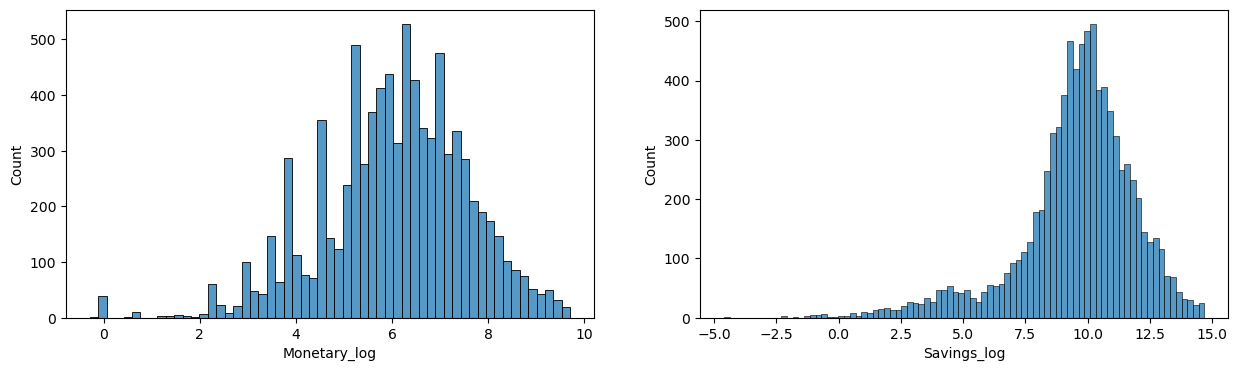

In [73]:
# format of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15,4))
# create histograms
for i, col in enumerate(rfm_df.columns[-2:]):
    sns.histplot(data=rfm_df, x=col, ax=axes[i])
plt.show()

The distributions for monetary and log now resemble normal distributions. To scale the features, StandardScaler will be used to give the features a mean of 0 and unit variance.

In [74]:
# Removing original monetary and savings features
rfm_df.drop(['Monetary', 'Savings'], axis=1, inplace=True)
rfm_df.columns

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/2693687568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df.drop(['Monetary', 'Savings'], axis=1, inplace=True)


Index(['Monetary_log', 'Savings_log'], dtype='object')

In [75]:
# Applying log has made some savings value infinity
np.isinf(rfm_df).any()

Monetary_log    False
Savings_log      True
dtype: bool

In [76]:
# Replaces infinity with null
rfm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Removes rows containing null values
rfm_df.dropna(inplace=True)

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/1779670572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_1053/1779670572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df.dropna(inplace=True)


In [77]:
rfm_df.isna().sum()

Monetary_log    0
Savings_log     0
dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(rfm_df)
scaled_df = pd.DataFrame(scaled_array, index=rfm_df.index, columns=rfm_df.columns)
scaled_df

,Monetary_log,Savings_log
CustomerID,,
C4536058,-0.335474,-0.942459
C1297687,1.405861,0.395204
C4819291,-0.923033,0.102120
C1821025,-0.496349,-0.397156
C3127057,-0.050735,-1.121043
...,...,...
C3820958,1.296883,-0.112281
C1046932,0.339801,0.611765
C9034114,0.230032,0.224530


/Users/graham/anaconda3/envs/DataScience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


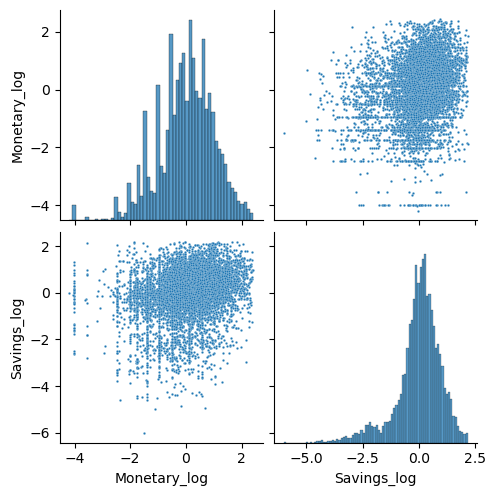

In [79]:
sns.pairplot(data=scaled_df, plot_kws={'s': 3})
plt.show()

<Axes: >

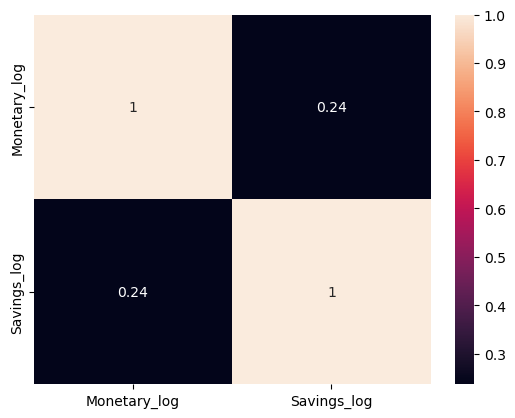

In [80]:
# heatmap of features
sns.heatmap(scaled_df.corr(), annot=True)

## Modeling

The K-Means clustering model will be used because it works efficiently on large datasets and generally results in tight clusters. It is also very interpretable. It's main downside is having to specify the number of clusters before modeling, but this can be optimized using the elbow method.

In [81]:
from sklearn.cluster import KMeans
# Calculating inertia for different number of clusters k
inertia = []
for k in range(2, 9):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    model.fit(scaled_df)
    inertia.append(model.inertia_)

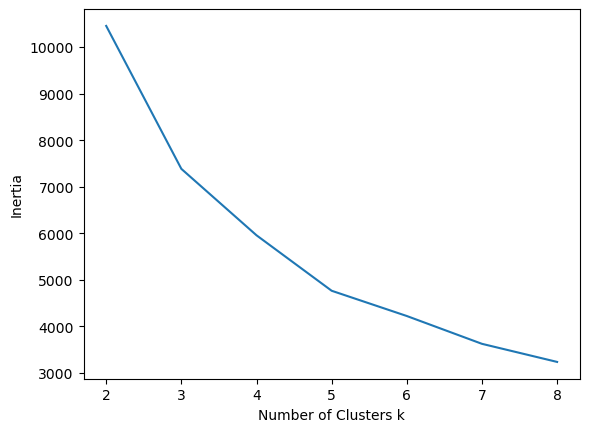

In [82]:
# Visualizing optimal k using elbow method
sns.lineplot(x=range(2, 9), y=inertia, markers=True)
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.show()

From the elbow plot above the optimal number of clusters is likely 3 or 4 since 'elbows' are located at those points. We'll try clustering using k=3,4,5 to see the varying results.

In [83]:
# Creating function for clustering with different k values and returning df with assigned clusters
def get_cluster_df(k, df):
    # Fit k-means with 4 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    # Adding cluster labels to supplied df
    df_clusters = df.assign(Cluster=cluster_labels)
    return df_clusters

In [84]:
df_k2 = get_cluster_df(2, scaled_df)
df_k3 = get_cluster_df(3, scaled_df)
df_k4 = get_cluster_df(4, scaled_df)
print(df_k2.head(), df_k3.head(), df_k4.head())

            Monetary_log  Savings_log  Cluster
CustomerID                                    
C4536058       -0.335474    -0.942459        1
C1297687        1.405861     0.395204        0
C4819291       -0.923033     0.102120        1
C1821025       -0.496349    -0.397156        1
C3127057       -0.050735    -1.121043        1             Monetary_log  Savings_log  Cluster
CustomerID                                    
C4536058       -0.335474    -0.942459        1
C1297687        1.405861     0.395204        0
C4819291       -0.923033     0.102120        2
C1821025       -0.496349    -0.397156        2
C3127057       -0.050735    -1.121043        1             Monetary_log  Savings_log  Cluster
CustomerID                                    
C4536058       -0.335474    -0.942459        1
C1297687        1.405861     0.395204        3
C4819291       -0.923033     0.102120        1
C1821025       -0.496349    -0.397156        1
C3127057       -0.050735    -1.121043        2


In [85]:
# Creating function to get mean of features for each k value
def mean_feature_df(df_k):
    df_k_avg = df_k.groupby('Cluster').mean()
    df_k_avg.rename(columns={'Recency':'Avg_Recency', 'Monetary_log':'Avg_Monetary', 'Savings_log':'Avg_Savings'}, inplace=True)
    return df_k_avg

In [86]:
df_k2_avg = mean_feature_df(df_k2)
df_k3_avg = mean_feature_df(df_k3)
df_k4_avg = mean_feature_df(df_k4)
display(df_k2_avg)
display(df_k3_avg)
display(df_k4_avg)

,Avg_Monetary,Avg_Savings
Cluster,,
0,0.520649,0.449687
1,-0.839477,-0.725059


,Avg_Monetary,Avg_Savings
Cluster,,
0,0.700171,0.434253
1,-0.298329,-2.052333
2,-0.871359,0.036915


,Avg_Monetary,Avg_Savings
Cluster,,
0,0.250321,0.909550
1,-1.016596,-0.110846
2,-0.383851,-2.221012
3,0.834144,-0.015428


In [87]:
df_k4_avg = df_k4.groupby('Cluster').mean()
df_k4_avg.rename(columns={'Recency':'Avg_Recency', 'Monetary_log':'Avg_Monetary', 'Savings_log':'Avg_Savings'}, inplace=True)
df_k4_avg

,Avg_Monetary,Avg_Savings
Cluster,,
0,0.250321,0.909550
1,-1.016596,-0.110846
2,-0.383851,-2.221012
3,0.834144,-0.015428


In [88]:
# from sklearn.decomposition import PCA
# # Creating function to reduce the dimensions to 2 so they can be plotted in 2D
# def cluster_pca(df, df_k):
#     pca = PCA(n_components=2)
#     pca_array = pca.fit_transform(df)
#     pca_df = pd.DataFrame(pca_array, index=df.index, columns=['x', 'y'])
#     pca_df['Cluster'] = df_k['Cluster']
#     return pca_df

In [89]:
# # Getting pca dataframes with reduced dimensions for each k
# pca_k2_df = cluster_pca(scaled_df, df_k2)
# pca_k3_df = cluster_pca(scaled_df, df_k3)
# pca_k4_df = cluster_pca(scaled_df, df_k4)

In [90]:
def plot_clusters(pca_df, k):
    sns.scatterplot(data=pca_df, x='Monetary_log', y='Savings_log', hue='Cluster')
    plt.xlabel('Monetary')
    plt.ylabel('Savings')
    plt.title(f"{k} Clusters")
    plt.show()

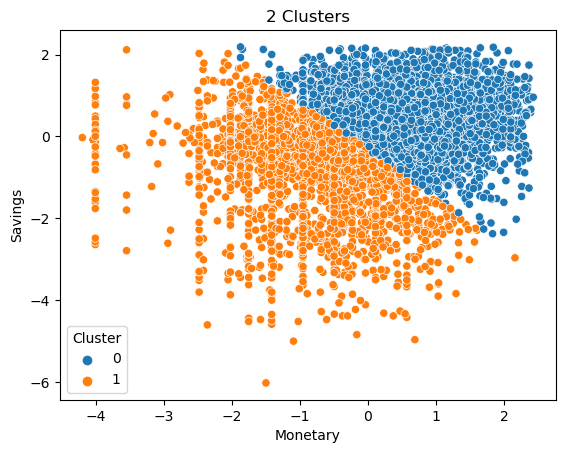

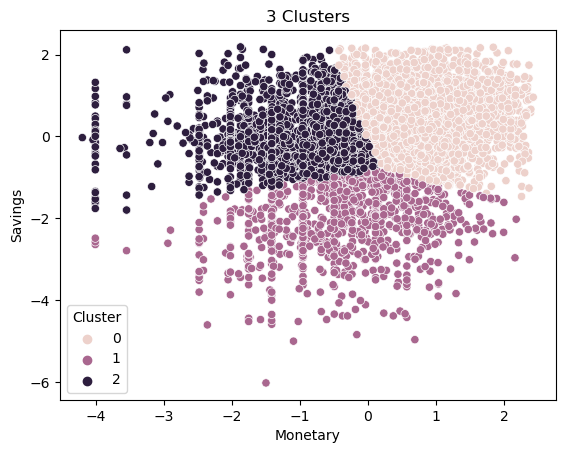

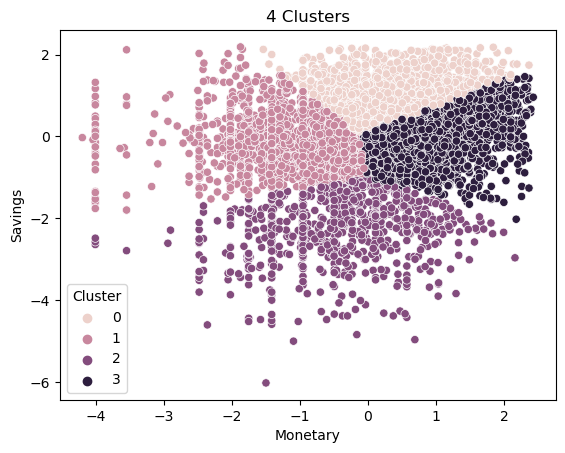

In [91]:
# Plotting clusters for each k
plot_clusters(df_k2, 2)
plot_clusters(df_k3, 3)
plot_clusters(df_k4, 4)

In [92]:
sns.scatterplot(data=pca_df, x='x', y='y', hue='Cluster')
plt.show()

NameError: name 'pca_df' is not defined

In [ ]:
X = RFM_scores[['Recency', 'Frequency', 'Monetary']]
# Perform clustering using k=4
best_model = KMeans(n_clusters=4, init='k-means++', n_init='auto')
# Add cluster column to RFM score df
RFM_scores['Cluster'] = best_model.fit_predict(X)
RFM_scores

In [ ]:
# Calculating mean RFM scores for each cluster
cluster_RFM = RFM_scores.groupby('Cluster').agg({'Recency':'mean', 'Frequency':'mean', 'Monetary': 'mean'})
cluster_RFM

In [ ]:
# Plotting the mean RFM scores for each cluster for visualization
plt.figure(figsize=(10, 8))

# Plotting mean Recency
plt.subplot(3, 1, 1)
sns.barplot(data=cluster_RFM, x=cluster_RFM.index, y='Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Plotting mean frequency
plt.subplot(3, 1, 2)
sns.barplot(data=cluster_RFM, x=cluster_RFM.index, y='Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Plotting mean monetary
plt.subplot(3, 1, 3)
sns.barplot(data=cluster_RFM, x=cluster_RFM.index, y='Monetary')
plt.xlabel('Cluster')
plt.ylabel('Monetary')

plt.subplots_adjust(hspace=0.3)
plt.show()

We can see some trends here in the groups. However the frequency column is not very useful as all clusters have similar mean values. We can try adjusting the bins edges to see if we can achieve better frequency differences between each cluster.